#**Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#**Data description**

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Thyroid_Detection/trainedDataset.csv")
df.head()

,Unnamed: 0,Age,Sex,parameterT3,parameterT4,parameterTSH,Result
0,0,57.2,F,120.00,8.92,1.78,Ok
1,1,33.0,F,108.10,8.68,3.12,Ok
2,2,47.0,F,112.50,7.76,1.19,Ok
3,3,35.0,F,128.80,9.83,2.57,Ok
4,4,44.0,M,74.34,3.48,25.10,Hypothyroidism


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5744 non-null   int64  
 1   Age           5744 non-null   float64
 2   Sex           5744 non-null   object 
 3   parameterT3   5744 non-null   float64
 4   parameterT4   5744 non-null   float64
 5   parameterTSH  5744 non-null   float64
 6   Result        5744 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.2+ KB


In [ ]:
df.describe()

,Unnamed: 0,Age,parameterT3,parameterT4,parameterTSH
count,5744.000000,5744.000000,5744.000000,5744.000000,5744.000000
mean,2871.500000,40.614446,114.265023,7.925923,6.732181
std,1658.294304,15.665092,42.721275,2.285814,27.342283
min,0.000000,0.003000,19.530000,0.420000,0.005000
25%,1435.750000,30.000000,93.760000,6.660000,1.560000
50%,2871.500000,40.000000,109.400000,7.710000,2.630000
75%,4307.250000,51.200000,126.725000,8.870000,4.510000
max,5743.000000,96.000000,655.000000,24.800000,508.000000


#**Data Visualization**

###**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


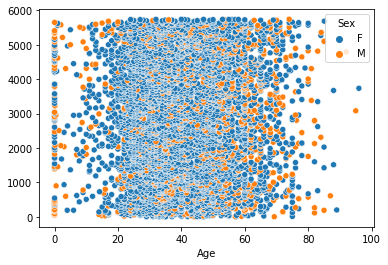

In [ ]:
sns.scatterplot(df.Age,df.index,hue=df['Sex'])

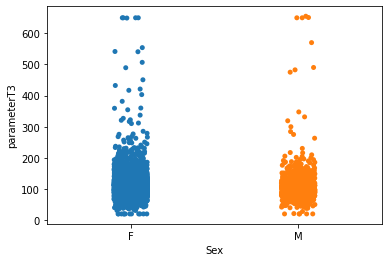

In [ ]:
sns.stripplot(y=df['parameterT3'],x=df['Sex'],)

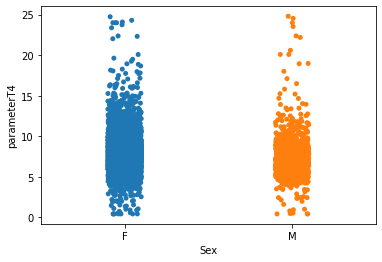

In [ ]:
sns.stripplot(y=df['parameterT4'],x=df['Sex'],)

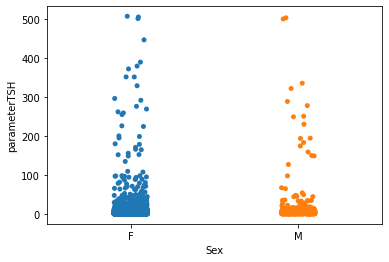

In [ ]:
sns.stripplot(y=df['parameterTSH'],x=df['Sex'],)

In [ ]:
dmf=df.drop(['Sex','Result','Age',''],axis=1)
dmf.values
plt.title("Box Plot for T3,T4 and TSH")
plt.boxplot(dmf.values,labels=['parameterT3','parameterT4','parameterTSH'])

KeyError: ignored

<bound method DataFrame.info of        Trial      Hormones   value
0       M-T3   parameterT3   74.34
1       M-T3   parameterT3  111.70
2       M-T3   parameterT3  112.30
3       M-T3   parameterT3  134.90
4       M-T3   parameterT3   96.15
...      ...           ...     ...
51691  F-TSH  parameterTSH   15.70
51692  F-TSH  parameterTSH   29.80
51693  F-TSH  parameterTSH   20.20
51694  F-TSH  parameterTSH   17.00
51695  F-TSH  parameterTSH   18.70

[51696 rows x 3 columns]>
       Trial      Hormones  value
51676  F-TSH  parameterTSH   38.4
51677  F-TSH  parameterTSH   14.8
51678  F-TSH  parameterTSH   83.9
51679  F-TSH  parameterTSH   33.4
51680  F-TSH  parameterTSH   20.7
51681  F-TSH  parameterTSH   24.1
51682  F-TSH  parameterTSH   30.1
51683  F-TSH  parameterTSH   22.2
51684  F-TSH  parameterTSH    8.8
51685  F-TSH  parameterTSH   40.8
51686  F-TSH  parameterTSH    2.5
51687  F-TSH  parameterTSH   22.4
51688  F-TSH  parameterTSH   13.4
51689  F-TSH  parameterTSH   23.3
51690  F-TS

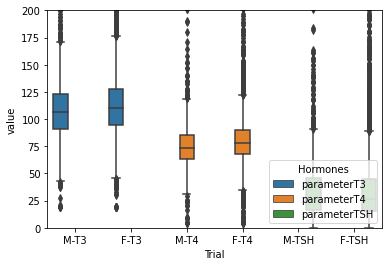

In [ ]:

df1 = pd.DataFrame(df['parameterT3'].loc[df['Sex'] == 'M'],columns=['parameterT3']).assign(Trial="M-T3")

df2 = pd.DataFrame(df['parameterT3'],columns=['parameterT3']).assign(Trial="F-T3")
df3 = pd.DataFrame(df['parameterT4'].loc[df['Sex'] == 'M']*10,columns=['parameterT4']).assign(Trial="M-T4")
df4 = pd.DataFrame(df['parameterT4'].loc[df['Sex'] == 'F']*10,columns=['parameterT4']).assign(Trial="F-T4")
df5 = pd.DataFrame(df['parameterTSH'].loc[df['Sex'] == 'M']*10,columns=['parameterTSH']).assign(Trial="M-TSH")
df6 = pd.DataFrame(df['parameterTSH'].loc[df['Sex'] == 'F']*10,columns=['parameterTSH']).assign(Trial="F-TSH")

cdf = pd.concat([df1, df2, df3,df4,df5,df6])

mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Hormones']) 
print(mdf.info)
print(mdf.tail(20))

ax = sns.boxplot(x="Trial", y="value", hue="Hormones", data=mdf)   
ax.set_ylim([0, 200])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


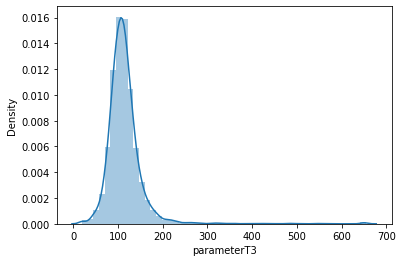

In [ ]:
sns.distplot(df['parameterT3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


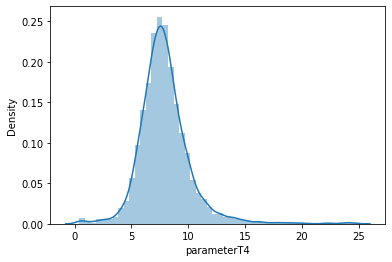

In [ ]:
sns.distplot(df['parameterT4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


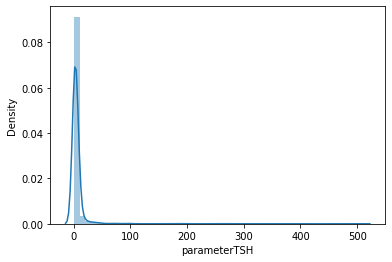

In [ ]:
sns.distplot(df['parameterTSH'])

#**Multivariate Analysis**

In [ ]:
df['Result'].unique()

array(['Ok', 'Hypothyroidism', 'Primary Hyperthyroidism',
       'Primary Hypothyroidism', 'More Diagnosis', 'Hyperthyroidism',
       'Early Hyperthyroidism', 'Pituitary Gland Abnormal'], dtype=object)

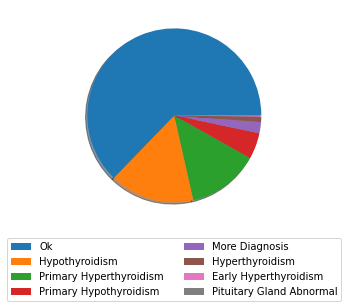

In [ ]:
plt.pie(df['Result'].value_counts(),shadow=True)
plt.legend(labels=['Ok', 'Hypothyroidism', 'Primary Hyperthyroidism',
       'Primary Hypothyroidism', 'More Diagnosis', 'Hyperthyroidism',
       'Early Hyperthyroidism', 'Pituitary Gland Abnormal'], loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)

ValueError: ignored

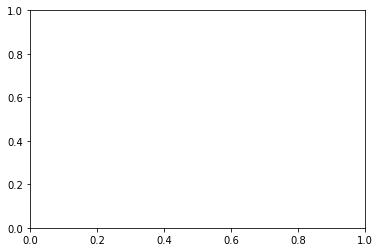

In [ ]:
gender_set = set(df['Sex'])
for gender in gender_set:
     selected_data = df.loc[df['Sex'] == gender]
     plt.boxplot(selected_data['parameterTSH'], selected_data['parameterT4'])

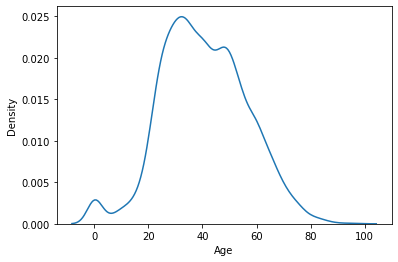

In [ ]:
sns.kdeplot(df['Age'])

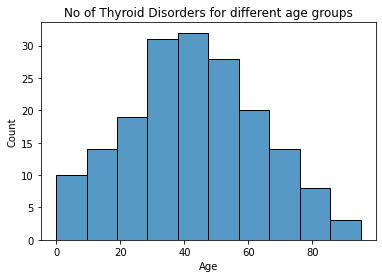

In [ ]:
okValueIndexes=list(df.loc[df["Result"]=="Ok"].index)
diagnosisValueIndexes=list(df.loc[df["Result"]=="More Diagnosis"].index)
values=okValueIndexes+diagnosisValueIndexes
dfCopy=df.drop(values,axis=0)
dfCopy['Age']=pd.to_numeric(dfCopy['Age'])
dictAge={}
for i in dfCopy['Age']:
  if i in dictAge:
    dictAge[i]=dictAge[i]+1
  else:
    dictAge[i]=1

dfAge=pd.DataFrame({'Age':dictAge.keys(),'Thyroid':dictAge.values()})
dfAge.head()

sns.histplot(x="Age",data=dfAge)
plt.title('No of Thyroid Disorders for different age groups')
plt.show()





In [ ]:
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
location = geolocator.geocode("PANVEL")
print(location)

Panvel, Raigad, Maharashtra, India


In [ ]:
import requests

GOOGLE_MAPS_API_URL = 'http://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'PANVEL ',
            'sensor': 'false',
            'region': 'india'}

        # Do the request and get the response data
req = requests.get(GOOGLE_MAPS_API_URL, params=params)
res = req.json()
print(res)

        # Use the first result
result = res['results']

geodata = dict()

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


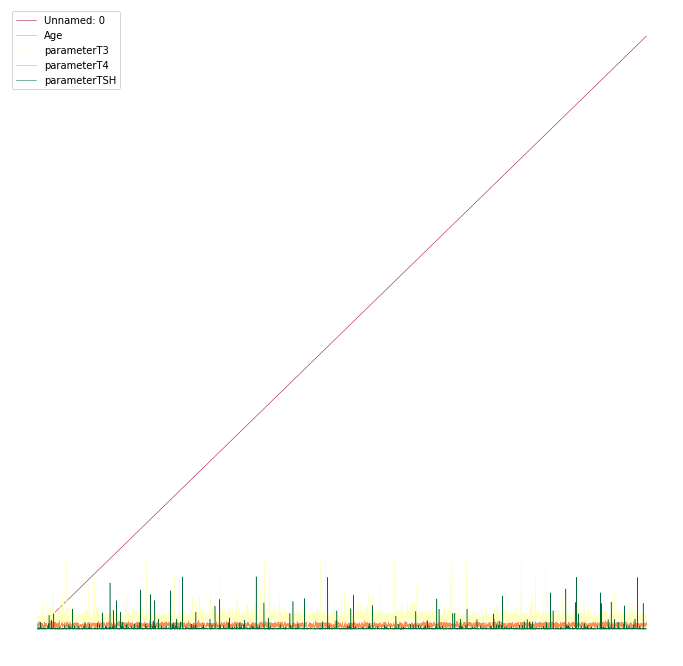

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')

fig = df.plot( cmap='RdYlGn', linewidth=0.5, ax=ax,legend=True)

In [ ]:
okValueIndexes=list(df.loc[df["Result"]=="Hyperthyroidism"].index)
len(okValueIndexes)

56

In [ ]:
dfLocation= pd.read_csv("/content/drive/MyDrive/Thyroid_Detection/locationThyroid.csv")
dfLocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             122 non-null    float64
 1   Sex             122 non-null    object 
 2   reportDate      122 non-null    object 
 3   parameterT3     122 non-null    float64
 4   parameterT4     122 non-null    float64
 5   parameterTSH    122 non-null    object 
 6   GroupName       122 non-null    object 
 7   isAbnormalT3    122 non-null    object 
 8   isAbnormalT4    122 non-null    object 
 9   isAbnormalTSH   122 non-null    object 
 10  UOMCode         122 non-null    object 
 11  clientCode      122 non-null    object 
 12  referenceRange  122 non-null    object 
 13  clientName      122 non-null    object 
 14  status          122 non-null    object 
 15  Result          122 non-null    object 
 16  Location        122 non-null    object 
dtypes: float64(3), object(14)
memory us

In [ ]:
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
lat=[]
lon=[]
for i in dfLocation['Location']:
  location = geolocator.geocode(i)
  lat.append(location.latitude)
  lon.append(location.longitude)






In [ ]:
dfLocation['Latitude']=lat
dfLocation['Longitude']=lon

122

In [ ]:
import folium
m=folium.Map(location=[34.223334,-82.461707],
            tiles='Stamen toner',
            zoom_start=8)
def circle_maker(x):
    folium.Circle(location=[x[0],x[1]],
                 radius=10,
                 color="blue",
                popup='{}\n confirmed cases:{}'.format(x[3],x[2])).add_to(m))
    
dfLocation[['Latitude','Longitude']].apply(lambda x:circle_maker(x),axis=1)

In [ ]:
import plotly.express as px
fig = px.scatter_geo(dfLocation, lat=dfLocation['Latitude'],
                    lon=dfLocation['Longitude'])
fig.show()

In [ ]:
dfDate= pd.read_csv("/content/drive/MyDrive/Thyroid_Detection/Date.csv")

dfDate.head()

,Unnamed: 0,Unnamed: 0.1,Age,Sex,reportDate,parameterT3,parameterT4,parameterTSH,GroupName,isAbnormalT3,isAbnormalT4,isAbnormalTSH,UOMCode,clientCode,referenceRange,clientName,status,Result
0,731,731,14.2,F,Dec,117.8,6.57,1.58,Thyroid panel-1 (T3/T4/TSH),N,N,N,ng/dL,MC001_1,91.1-217.4<br>Note : Change in Method & Refere...,MICRON METROPOLIS RAJE COMPLEX,Approve,Ok
1,832,832,52.0,M,Dec,118.8,8.00,3.2,Thyroid panel-1 (T3/T4/TSH),N,N,N,ng/dL,CUS11675,84.6-201.8<br>Note : Change in Method & Refere...,TERRALS TECHNOLOGIES PVT LTD - CASH,Approve,Ok
2,833,833,48.0,M,Dec,92.9,6.75,1.93,Thyroid panel-1 (T3/T4/TSH),N,N,N,ng/dL,CUS11675,84.6-201.8<br>Note : Change in Method & Refere...,TERRALS TECHNOLOGIES PVT LTD - CASH,Approve,Ok
3,834,834,49.0,M,Dec,128.7,6.82,3.09,Thyroid panel-1 (T3/T4/TSH),N,N,N,ng/dL,CUS11675,84.6-201.8<br>Note : Change in Method & Refere...,TERRALS TECHNOLOGIES PVT LTD - CASH,Approve,Ok
4,901,901,52.0,F,Dec,123.4,9.13,0.889,Thyroid panel-1 (T3/T4/TSH),N,N,N,ng/dL,CUS12490,84.6-201.8<br>Note : Change in Method & Refere...,METROPOLIS HEALTHCARE LIMITED - KHOPOLI PSC,Approve,Ok


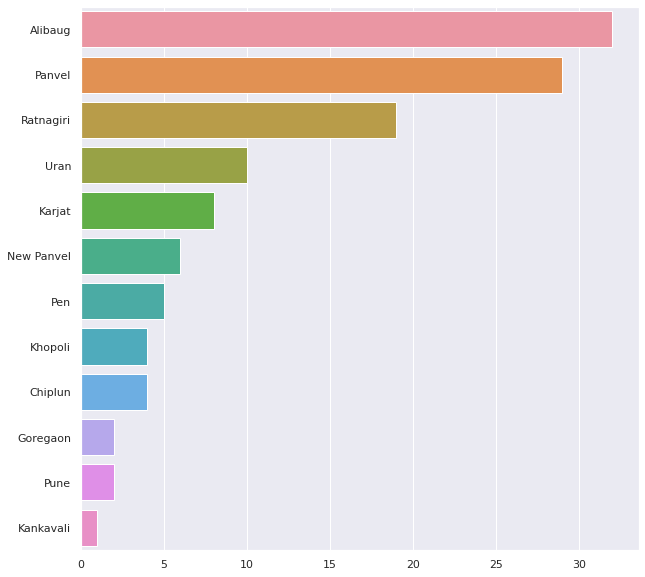

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=dfLocation['Location'].value_counts().values,y=dfLocation['Location'].value_counts().index)

In [ ]:
dictDate={}
for i in dfDate['reportDate']:
  if i in dictDate:
    dictDate[i]=dictDate[i]+1
  else:
    dictDate[i]=1
dictDate['Dec-2021'] = dictDate['Dec']
del dictDate['Dec']
dictDate['Jan-2022'] = dictDate['Jan']
del dictDate['Jan']
dictDate['Feb-2022'] = dictDate['Feb']
del dictDate['Feb']
dictDate['Mar-2022'] = dictDate['Mar']
del dictDate['Mar']
dictDate['Apr-2022'] = dictDate['Apr']
del dictDate['Apr']
dictDate['May-2022'] = dictDate['May']
del dictDate['May']
dfDate=pd.DataFrame({'Date':dictDate.keys(),'Cases':dictDate.values()})
dfDate.head()

,Date,Cases
0,Dec-2021,11
1,Jan-2022,1210
2,Feb-2022,1145
3,Mar-2022,1465
4,Apr-2022,1232


In [ ]:
fig = px.line(dfDate, x='Date',y='Cases')
fig.show()